# Fine Tuning a Lasagne Neural Network

In [92]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import log_loss
from nolearn.lasagne import NeuralNet
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.updates import adagrad
from lasagne.nonlinearities import softmax

# Import Data (Kaggle OTTO challenge)

In [93]:
X = pd.read_csv('../train.csv')
X = X.drop('id', axis=1)

# Shuffle data. It is originally oredered by class, it's too easy ...
X = X.reindex(np.random.permutation(X.index))

# Extract target
# Encode it to make it manageable by ML algo
# Convert to np.int32 to make lasagne happy
y = X.target.values
encoder = LabelEncoder()
y = encoder.fit_transform(y).astype(np.int32)

# Remove target from train, else it's too easy ...
X = X.drop('target', axis=1)

num_classes = len(encoder.classes_)
num_features = X.shape[1]

# Convert to np.array to make lasagne happy
X = np.array(X)

# First attempt

In [94]:
layers = [('input', InputLayer),
           ('dense0', DenseLayer),
           ('dropout0', DropoutLayer),
           ('dense1', DenseLayer),
           ('dropout1', DropoutLayer),
           ('output', DenseLayer)]

In [95]:
net1 = NeuralNet(layers=layers,
                 input_shape=(None, num_features),
                 dense0_num_units=512,
                 dropout0_p=0.1,
                 dense1_num_units=256,
                 dropout1_p=0.1,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 update=adagrad,
                 update_learning_rate=0.04,
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=15)
net1.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 256)         	produces     256 outputs
  DenseLayer        	(None, 256)         	produces     256 outputs
  DropoutLayer      	(None, 512)         	produces     512 outputs
  DenseLayer        	(None, 512)         	produces     512 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    0.961585  |    0.569846  |     1.687448  |     78.39%  |  3.4s
     2  |    0.551856  |    0.536417  |     1.028781  |     79.62%  |  3.4s
     3  |    0.510527  |    0.518852  |     0.983957  |     80.23%  |  3.4s
     4  |    0.479324  |    0.507040  |     0.945338  |     80.44%  |  3.5s
     5  |    0.455582  |    0.502916  |     0.905882  |     80.66%  |  3.5s
     6  |    0.434376  |    0.498440  |     0.871470  |     81.11

NeuralNet(X_tensor_type=<function matrix at 0x10bf9b8c0>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10d0a1310>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10d0a12d0>,
     dense0_num_units=512, dense1_num_units=256, dropout0_p=0.1,
     dropout1_p=0.1, eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout0', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10d09d488>, max_epochs=15,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<function softmax at 0x10c72d488>,
     output_num_units=9, regression=False,
     update=<function adagrad at 0x10d09d6e0>, update_lear

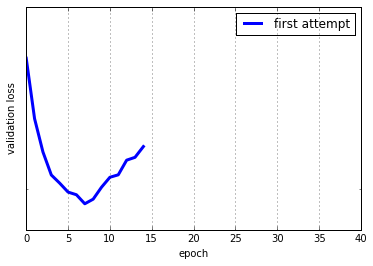

In [115]:
from matplotlib import pyplot
valid_loss1 = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(valid_loss1, linewidth=3, label="first attempt")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("validation loss")
pyplot.xlim(0, 40)
pyplot.ylim(0.48, 0.6)
pyplot.yscale("log")
pyplot.show()

##### We want to minimize loss.
##### We can see that optimal performance is achieved around epoch = 6.
##### After, the model is overfitting, and performance is worse.
##### Let's add some drop out to prevent overfitting.

# Increase dropout

In [97]:
net2 = NeuralNet(layers=layers,
                 input_shape=(None, num_features),
                 dense0_num_units=512,
                 dropout0_p=0.4,
                 dense1_num_units=256,
                 dropout1_p=0.4,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 update=adagrad,
                 update_learning_rate=0.04,
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=15)
net2.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 256)         	produces     256 outputs
  DenseLayer        	(None, 256)         	produces     256 outputs
  DropoutLayer      	(None, 512)         	produces     512 outputs
  DenseLayer        	(None, 512)         	produces     512 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    1.044973  |    0.609677  |     1.713979  |     76.69%  |  3.5s
     2  |    0.635917  |    0.570027  |     1.115591  |     78.37%  |  3.4s
     3  |    0.590609  |    0.551541  |     1.070835  |     78.88%  |  3.4s
     4  |    0.564516  |    0.535426  |     1.054331  |     79.61%  |  3.4s
     5  |    0.548861  |    0.526909  |     1.041661  |     79.50%  |  3.5s
     6  |    0.530427  |    0.518840  |     1.022332  |     79.89

NeuralNet(X_tensor_type=<function matrix at 0x10bf9b8c0>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10d0a1310>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10d0a12d0>,
     dense0_num_units=512, dense1_num_units=256, dropout0_p=0.4,
     dropout1_p=0.4, eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout0', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10d09d488>, max_epochs=15,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<function softmax at 0x10c72d488>,
     output_num_units=9, regression=False,
     update=<function adagrad at 0x10d09d6e0>, update_lear

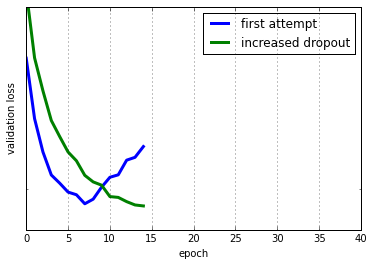

In [116]:
valid_loss1 = np.array([i["valid_loss"] for i in net1.train_history_])
valid_loss2 = np.array([i["valid_loss"] for i in net2.train_history_])
pyplot.plot(valid_loss1, linewidth=3, label="first attempt")
pyplot.plot(valid_loss2, linewidth=3, label="increased dropout")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("validation loss")
pyplot.xlim(0, 40)
pyplot.ylim(0.48, 0.6)
pyplot.yscale("log")
pyplot.show()

##### That's better. No more overfitting, and we feel we can increase epoch.
##### Let's do it, to see what loss we can reach...

# Increase epoch

In [99]:
net3 = NeuralNet(layers=layers,
                 input_shape=(None, num_features),
                 dense0_num_units=512,
                 dropout0_p=0.4,
                 dense1_num_units=256,
                 dropout1_p=0.4,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 update=adagrad,
                 update_learning_rate=0.04,
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=40)
net3.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 256)         	produces     256 outputs
  DenseLayer        	(None, 256)         	produces     256 outputs
  DropoutLayer      	(None, 512)         	produces     512 outputs
  DenseLayer        	(None, 512)         	produces     512 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    1.083684  |    0.615322  |     1.761166  |     77.18%  |  3.6s
     2  |    0.634421  |    0.573250  |     1.106709  |     78.71%  |  3.6s
     3  |    0.595260  |    0.549643  |     1.082995  |     78.87%  |  3.5s
     4  |    0.569254  |    0.536748  |     1.060560  |     79.54%  |  3.5s
     5  |    0.547817  |    0.525652  |     1.042167  |     79.84%  |  3.7s
     6  |    0.535484  |    0.518100  |     1.033553  |     80.00

NeuralNet(X_tensor_type=<function matrix at 0x10bf9b8c0>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10d0a1310>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10d0a12d0>,
     dense0_num_units=512, dense1_num_units=256, dropout0_p=0.4,
     dropout1_p=0.4, eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout0', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10d09d488>, max_epochs=40,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<function softmax at 0x10c72d488>,
     output_num_units=9, regression=False,
     update=<function adagrad at 0x10d09d6e0>, update_lear

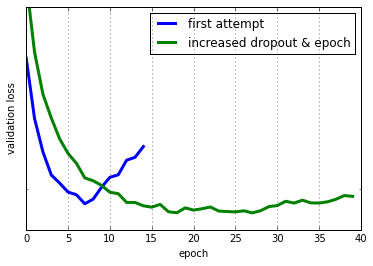

In [117]:
valid_loss1 = np.array([i["valid_loss"] for i in net1.train_history_])
valid_loss3 = np.array([i["valid_loss"] for i in net3.train_history_])
pyplot.plot(valid_loss1, linewidth=3, label="first attempt")
pyplot.plot(valid_loss3, linewidth=3, label="increased dropout & epoch")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("validation loss")
pyplot.xlim(0, 40)
pyplot.ylim(0.48, 0.6)
pyplot.yscale("log")
pyplot.show()

##### Let's see if we can improve performance further by adding neurons

# Increase number of neurons

In [101]:
net4 = NeuralNet(layers=layers,
                 input_shape=(None, num_features),
                 dense0_num_units=2000,
                 dropout0_p=0.4,
                 dense1_num_units=1000,
                 dropout1_p=0.4,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 update=adagrad,
                 update_learning_rate=0.04,
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=25)
net4.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 1000)        	produces    1000 outputs
  DenseLayer        	(None, 1000)        	produces    1000 outputs
  DropoutLayer      	(None, 2000)        	produces    2000 outputs
  DenseLayer        	(None, 2000)        	produces    2000 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    3.202985  |    0.601103  |     5.328511  |     77.21%  |  25.3s
     2  |    0.619425  |    0.568111  |     1.090324  |     77.96%  |  25.4s
     3  |    0.577776  |    0.542747  |     1.064539  |     79.19%  |  25.4s
     4  |    0.547984  |    0.529065  |     1.035759  |     79.62%  |  25.4s
     5  |    0.523010  |    0.518455  |     1.008787  |     79.94%  |  25.5s
     6  |    0.500298  |    0.506722  |     0.987321  |     

NeuralNet(X_tensor_type=<function matrix at 0x10bf9b8c0>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10d0a1310>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10d0a12d0>,
     dense0_num_units=2000, dense1_num_units=1000, dropout0_p=0.4,
     dropout1_p=0.4, eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout0', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10d09d488>, max_epochs=25,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<function softmax at 0x10c72d488>,
     output_num_units=9, regression=False,
     update=<function adagrad at 0x10d09d6e0>, update_le

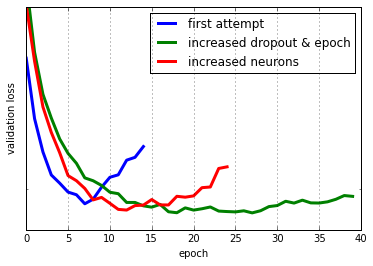

In [118]:
valid_loss1 = np.array([i["valid_loss"] for i in net1.train_history_])
valid_loss3 = np.array([i["valid_loss"] for i in net3.train_history_])
valid_loss4 = np.array([i["valid_loss"] for i in net4.train_history_])
pyplot.plot(valid_loss1, linewidth=3, label="first attempt")
pyplot.plot(valid_loss3, linewidth=3, label="increased dropout & epoch")
pyplot.plot(valid_loss4, linewidth=3, label="increased neurons")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("validation loss")
pyplot.xlim(0, 40)
pyplot.ylim(0.48, 0.6)
pyplot.yscale("log")
pyplot.show()

##### That's better, but we start overfitting around epoch 12.
##### To prevent overfitting let's now decrease the learning rate.

# Decrease learning rate

In [103]:
net5 = NeuralNet(layers=layers,
                 input_shape=(None, num_features),
                 dense0_num_units=2000,
                 dropout0_p=0.4,
                 dense1_num_units=1000,
                 dropout1_p=0.4,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 update=adagrad,
                 update_learning_rate=0.004,
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=40)
net5.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 1000)        	produces    1000 outputs
  DenseLayer        	(None, 1000)        	produces    1000 outputs
  DropoutLayer      	(None, 2000)        	produces    2000 outputs
  DenseLayer        	(None, 2000)        	produces    2000 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    0.785066  |    0.605714  |     1.296100  |     78.05%  |  26.9s
     2  |    0.604593  |    0.573043  |     1.055058  |     78.96%  |  27.0s
     3  |    0.571249  |    0.555948  |     1.027522  |     79.20%  |  26.4s
     4  |    0.549684  |    0.543490  |     1.011397  |     79.53%  |  26.6s
     5  |    0.532101  |    0.533102  |     0.998122  |     79.86%  |  26.6s
     6  |    0.519003  |    0.526830  |     0.985143  |     

NeuralNet(X_tensor_type=<function matrix at 0x10bf9b8c0>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10d0a1310>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10d0a12d0>,
     dense0_num_units=2000, dense1_num_units=1000, dropout0_p=0.4,
     dropout1_p=0.4, eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout0', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10d09d488>, max_epochs=40,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<function softmax at 0x10c72d488>,
     output_num_units=9, regression=False,
     update=<function adagrad at 0x10d09d6e0>, update_le

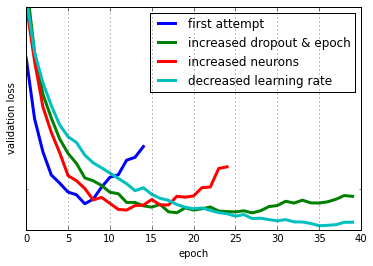

In [119]:
valid_loss1 = np.array([i["valid_loss"] for i in net1.train_history_])
valid_loss3 = np.array([i["valid_loss"] for i in net3.train_history_])
valid_loss4 = np.array([i["valid_loss"] for i in net4.train_history_])
valid_loss5 = np.array([i["valid_loss"] for i in net5.train_history_])
pyplot.plot(valid_loss1, linewidth=3, label="first attempt")
pyplot.plot(valid_loss3, linewidth=3, label="increased dropout & epoch")
pyplot.plot(valid_loss4, linewidth=3, label="increased neurons")
pyplot.plot(valid_loss5, linewidth=3, label="decreased learning rate")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("validation loss")
pyplot.xlim(0, 40)
pyplot.ylim(0.48, 0.6)
pyplot.yscale("log")
pyplot.show()

##### We now have a good balance between number of neurons, dropout and learning rate
##### Note that other parameters could have been tuned : number of layers, activation function ....